In [76]:
import pandas as pd

bank_note_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )


In [77]:
bank_note_data

,VWTI,SWTI,CWTI,EI,Class
0,2.263400,-4.4862,3.65580,-0.612510,0
1,3.271800,1.7837,2.11610,0.613340,0
2,-3.941100,-12.8792,13.05970,-3.312500,1
3,0.519500,-3.2633,3.08950,-0.984900,0
4,2.569800,-4.4076,5.98560,0.078002,0
...,...,...,...,...,...
1091,1.640600,3.5488,1.39640,-0.364240,0
1092,-0.048008,-1.6037,8.47560,0.755580,0
1093,2.942100,7.4101,-0.97709,-0.884060,0
1094,1.964700,6.9383,0.57722,0.663770,0


**Data Description**

VWTI: Variance of Wavelet Transformed Image

SWTI: Skewness of Wavelet Transformed Image

CWTI: Curtosis of Wavelet Transformed Image

EI: Entropy of Image

Class: Class (1: genuine, 0: forged)

In [78]:
bank_note_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
 4   Class   1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 42.9 KB


In [4]:
bank_note_data.describe()

,VWTI,SWTI,CWTI,EI,Class
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.448500,1.780643,1.493533,-1.157454,0.445255
std,2.852623,5.922621,4.375655,2.084983,0.497221
min,-7.036400,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.790850,-2.125200,-1.574975,-2.246975,0.000000
50%,0.540430,2.205850,0.671900,-0.569190,0.000000
75%,2.835350,6.793925,3.574450,0.399980,1.000000
max,6.563300,12.730200,17.927400,2.449500,1.000000


In [79]:
bank_note_data.isnull().sum()

VWTI     0
SWTI     0
CWTI     0
EI       0
Class    0
dtype: int64

In [6]:
# bank_note_data.duplicated().sum()

17

In [7]:
# bank_note_data.drop_duplicates(inplace=True)

In [80]:
bank_note_data

,VWTI,SWTI,CWTI,EI,Class
0,2.263400,-4.4862,3.65580,-0.612510,0
1,3.271800,1.7837,2.11610,0.613340,0
2,-3.941100,-12.8792,13.05970,-3.312500,1
3,0.519500,-3.2633,3.08950,-0.984900,0
4,2.569800,-4.4076,5.98560,0.078002,0
...,...,...,...,...,...
1091,1.640600,3.5488,1.39640,-0.364240,0
1092,-0.048008,-1.6037,8.47560,0.755580,0
1093,2.942100,7.4101,-0.97709,-0.884060,0
1094,1.964700,6.9383,0.57722,0.663770,0


In [81]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')

In [82]:
test_data

,VWTI,SWTI,CWTI,EI
0,-0.40804,0.542140,-0.52725,0.658600
1,-3.71810,-8.508900,12.36300,-0.955180
2,5.50400,10.367100,-4.41300,-4.021100
3,1.68490,8.748900,-1.26410,-1.385800
4,4.74320,2.108600,0.13680,1.654300
...,...,...,...,...
270,-1.00500,0.084831,-0.24620,0.456880
271,2.21230,-5.839500,7.76870,-0.853020
272,4.38460,-4.879400,3.36620,-0.029324
273,3.88400,10.027700,-3.92980,-4.081900


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


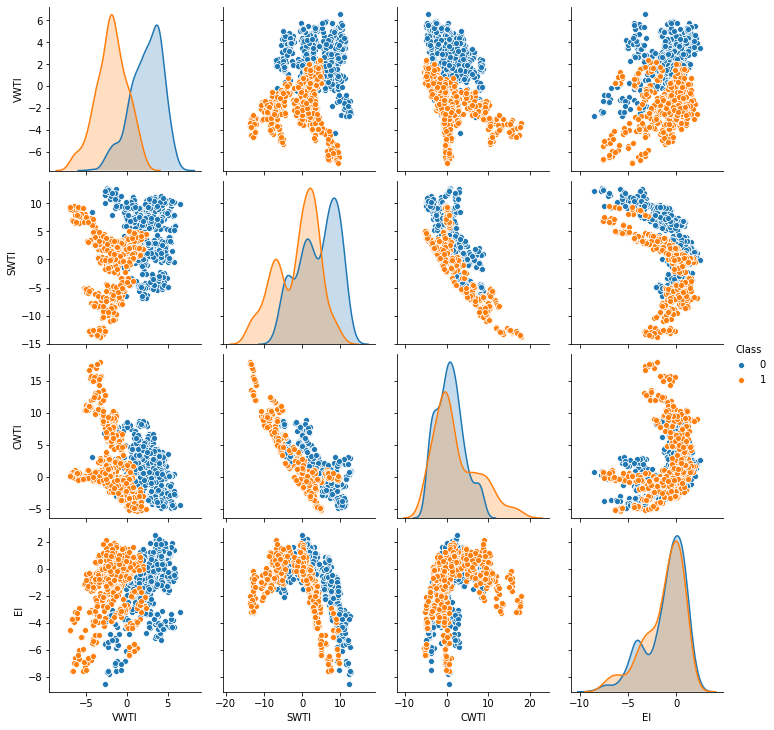

In [11]:
import seaborn as sns 
sns.pairplot(bank_note_data, hue="Class")

In [83]:
X = bank_note_data[["VWTI","SWTI","CWTI","EI"]]
y=  bank_note_data["Class"]

In [84]:
X.shape[1]

4

In [85]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [86]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape =(X.shape[1],)),
        layers.Dense(8, activation="relu"),
        layers.Dense(1, activation="sigmoid" )
    ]
)

In [89]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
model.fit(X,y, epochs=10, verbose=1)

Epoch 1/10
35/35 [==============================] - 0s 947us/step - loss: 0.5517 - accuracy: 0.6907
Epoch 2/10
35/35 [==============================] - 0s 870us/step - loss: 0.3926 - accuracy: 0.8047
Epoch 3/10
35/35 [==============================] - 0s 836us/step - loss: 0.2919 - accuracy: 0.8978
Epoch 4/10
35/35 [==============================] - 0s 852us/step - loss: 0.2107 - accuracy: 0.9562
Epoch 5/10
35/35 [==============================] - 0s 904us/step - loss: 0.1337 - accuracy: 0.9772
Epoch 6/10
35/35 [==============================] - 0s 890us/step - loss: 0.0831 - accuracy: 0.9918
Epoch 7/10
35/35 [==============================] - 0s 915us/step - loss: 0.0589 - accuracy: 0.9964
Epoch 8/10
35/35 [==============================] - 0s 961us/step - loss: 0.0449 - accuracy: 0.9973
Epoch 9/10
35/35 [==============================] - 0s 877us/step - loss: 0.0352 - accuracy: 0.9991
Epoch 10/10
35/35 [==============================] - 0s 870us/step - loss: 0.0281 - accuracy: 1.0000

In [91]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [93]:
a = model.predict(test_data)

In [96]:
a=a.round()
a

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [97]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(a) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>